In [52]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
# from random import choice, sample
import random
from itertools import combinations, groupby

# https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python

In [53]:
def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G

In [115]:
# https://plotly.com/python/network-graphs/
# https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python



n = 5
theta = .5
# G = nx.barabasi_albert_graph(100,2)
# G = nx.geographical_threshold_graph(n, theta)
# G = nx.random_geometric_graph(n, theta)
G = gnp_random_connected_graph(n,.5)

class graph_env():
    def __init__(self, G, numofhome = 1, numofblackout = 1, numofblackoutws = 0, numofchargingstation = 0, action_limit = 3):
        """Takes in a randomly generated graph, and keeps track of ep infomation
        numofhome - number of homes for agent starting point
        numofblackout - number of houses with blackout
        numofblackout - number of houses with solarpower
        """
        self.day = 0
        self.actionsdone = 0
        self.action_limit = 1 if ((action_limit -1) < -1)  else  action_limit - 1 #action limit can't be less than 0
        self.graph = G
        self.color_map = []

        self.allnodes = list(G.nodes())
        self.node_status = dict.fromkeys(self.allnodes,0)
        

        buffer_nodes = self.update_graph(self.allnodes, numofhome,5)
        buffer_nodes = self.update_graph(buffer_nodes, numofblackoutws,2)
        buffer_nodes = self.update_graph(buffer_nodes, numofblackout,1)
        buffer_nodes = self.update_graph(buffer_nodes, numofchargingstation,4)

        try:
            del self.node_status[None]
        except KeyError: 
            pass


    def update_graph(self,nodes,num_to_update,val):
        nodes_to_updates, buffer_nodes = self.remove_node(nodes, num_to_update)
        for node in nodes_to_updates:
            # print(home)
            node_update = {node: val}
            self.node_status.update(node_update)
        return buffer_nodes

    def remove_node(self,nodes, numtoremove=1):
        if numtoremove < 1:
            return [None], nodes
        nodes = list(nodes)
        samples = random.sample(nodes, 1)
        new_nodes = list(set(nodes).symmetric_difference(set(samples)))
        return samples, new_nodes

    def power_check(self):
        "read from blackout data to figure out if power is back or not 1,2 -> 3 "
        pass

    def next_day_check(self):
        if self.actionsdone > self.action_limit:
            self.day += 1
            self.actionsdone = 0
    
    def plot_color_nodes(self, update = True):
        if update == True: 
            self.color_map = []

            for key, val in self.node_status.items():
                if val == 0:
                    self.color_map.append('blue')
                if val == 1:
                    self.color_map.append('red')
                if val == 2:
                    self.color_map.append('orange')
                if val == 4:
                    self.color_map.append('yellow')
                if val == 5:
                    self.color_map.append('green')
        else: 
            pass

        nx.draw(self.graph, node_color=self.color_map, with_labels=True)
        
        

env = graph_env(G)

# print(env.home)
# print(env.clientwpowerstation)
# print(env.client)
# print(env.buffer_nodes)
print(env.node_status)
# for key, value in env.node_status.items() :
#     print(key, value)
#     print(type(key))
#     print(type(value))




{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 5, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 1, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0}


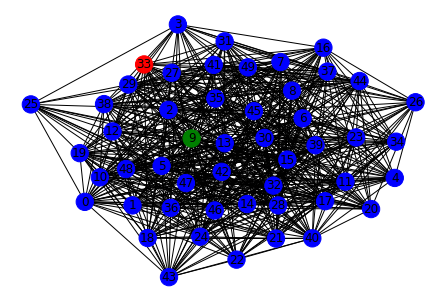

In [116]:
env.plot_color_nodes()

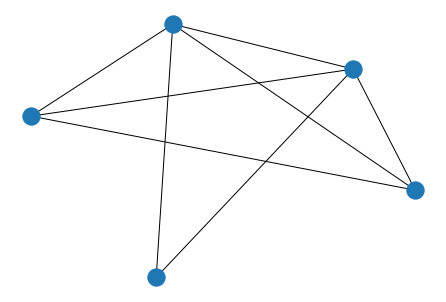

In [92]:
nx.draw_spring(G)

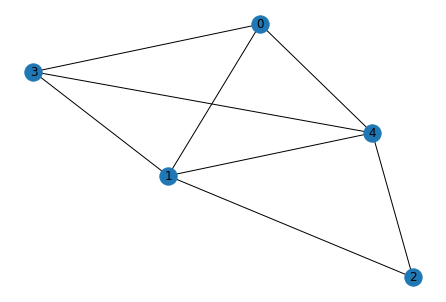

In [93]:
nx.draw(G, with_labels=1)

(array([1., 0., 0., 2., 0., 0., 1., 0., 0., 1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

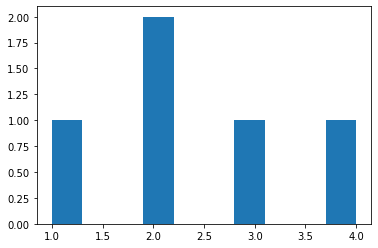

In [5]:
plt.hist([v for k,v in nx.degree(G)])

(array([1., 0., 2., 0., 0., 1., 0., 0., 0., 1.]),
 array([0.57142857, 0.61428571, 0.65714286, 0.7       , 0.74285714,
        0.78571429, 0.82857143, 0.87142857, 0.91428571, 0.95714286,
        1.        ]),
 <a list of 10 Patch objects>)

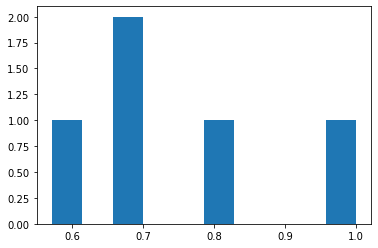

In [6]:
plt.hist(nx.centrality.closeness_centrality(G).values())

In [7]:
nx.diameter(G)

2

In [8]:
nx.cluster.average_clustering(G)

0.6

In [40]:
nodes = list(G.nodes())
samples = sample(nodes, 1)
new_nodes = list(set(nodes).symmetric_difference(set(samples)))
print(nodes)
print(samples)
print(new_nodes)

[0, 1, 2, 3, 4]
[1]
[0, 2, 3, 4]


In [12]:
nodes

[0, 1, 2, 3, 4]

In [20]:
samples = sample(nodes, 1)

In [22]:
samples

[4]

In [30]:

test = sample([1,2,3,4,5], 4)

In [31]:
test

[5, 3, 4, 1]

In [41]:
list([1,2,3])

[1, 2, 3]

In [56]:
# https://plotly.com/python/network-graphs/
# https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python



n = 5
theta = .5
# G = nx.barabasi_albert_graph(100,2)
# G = nx.geographical_threshold_graph(n, theta)
# G = nx.random_geometric_graph(n, theta)
G = gnp_random_connected_graph(n,.5)

class _graph_env():
    "Takes in a randomly generated graph, and keeps track of ep infomation"
    def __init__(self, G, numofhome = 1, numofblackout = 1, numofblackoutwps =0):
        self.allnodes = list(G.nodes())
        self.home, buffer_nodes = self.remove_node(self.allnodes, numofhome)
        self.clientwpowerstation, buffer_nodes = self.remove_node(buffer_nodes, numofblackoutwps)
        self.client, buffer_nodes = self.remove_node(buffer_nodes, numofblackout)
        self.buffer_nodes = buffer_nodes
        # print(G.edges(node))

    def remove_node(self,nodes, numtoremove=1):
        if numtoremove < 1:
            return None, nodes
        nodes = list(nodes)
        samples = random.sample(nodes, 1)
        new_nodes = list(set(nodes).symmetric_difference(set(samples)))
        return samples, new_nodes

# env = graph_env(G)

# print(env.home)
# print(env.clientwpowerstation)
# print(env.client)
# print(env.buffer_nodes)




[1]
None
[0]
[2, 3, 4]
